### DSCI 100: GROUP PROJECT PROPOSAL

GROUP 10 - SECTION 007: Michelle Ho, Arian Afshari, Kyle Wise, Zidong Zhou

In [1]:
library(tidyverse)
library(tidyr)
library(ggplot2)
library(tidymodels)
library(dplyr)
library(repr)
options(repr.matrix.max.rows = 7)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Introduction:** One of the leading causes of death in Hungary are cardiovascular diseases (CVDs) (OECD and WHO, 2017). It constitutes approximately 52.4% of the main diagnoses underlying cause of death and 47.6% of the secondary diagnoses prior to death. Several risk factors are known to be associated with CVDs; the most prominent among them are high blood pressure, high low-density lipoprotein (LDL) cholesterol levels, smoking, and overall, leading an unhealthy lifestyle (CDC, 2022). Moreover, susceptibility to heart disease increases with age and other uncontrollable factors such as sex (McLaren, 2023).
As data science becomes progressively useful in analyzing and interpreting patient outcomes, we plan to use the tools that we’ve learnt in class to predict the angiographic disease status of CVDs. Our project will use the Heart Disease data set from the UCI Machine Learning Repository to build a classification model that will predict CVD diagnoses in presenting patients. The diagnosis of heart disease in the data set is defined as a binary label, whether the patient has the disease or not. The disease is present if there is greater than 50% diameter narrowing in any of the major blood vessels in a patient. Ie., if the value in the num parameter is 1, then more than 50% of the diameter of the major blood vessels are narrowing (Hungarian Institute of Cardiology, 1988). When blood vessels narrow, the heart does not receive the blood that it requries and thus, results in heart disease. Overall, heart failure is a common result caused by CVDs. The dataset that we will be using features 14 attributes that will be examined to determine which are possible indicators of heart disease which will then be used to predict the presence of heart disease in patients.

**Preliminary exploratory data analysis:**

In [2]:
# setting the seed such that the numbers used in the analysis are reasonably random
set.seed(3789)

In [3]:
# loading the data and mutating the class label column to factor 
heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", 
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak", 
                                        "slope", "ca", "thal", "num")) |>
mutate(num = as_factor(num))
heart_disease_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


In [4]:
# partitioning the data into a training (75%) and testing (25%) set; num will be used as the class label
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)

heart_disease_train <- training(heart_disease_split)
heart_disease_train

heart_disease_test <- testing(heart_disease_split)
heart_disease_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
54,0,3,130,294,0,1,100,1,0,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
36,1,2,120,166,0,0,180,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,4,160,291,0,1,158,1,3.0,2,?,?,1
52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
56,1,4,155,342,1,0,150,1,3.0,2,?,?,1


In [5]:
# identifying the proportion of cases with a diagnosis of heart disease (positive angiographic disease status) and the proportion without in the full data
# set and the training data set to ensure that the proportions are preserved during the split
heart_disease_data_proportions <- heart_disease_data |>
                      group_by(num) |>
                      summarize(people = n()) |>
                      mutate(percent = 100*people/nrow(heart_disease_data))
heart_disease_data_proportions

heart_disease_train_proportions <- heart_disease_train |>
                      group_by(num) |>
                      summarize(people = n()) |>
                      mutate(percent = 100*people/nrow(heart_disease_train))
heart_disease_train_proportions

num,people,percent
<fct>,<int>,<dbl>
0,188,63.94558
1,106,36.05442


num,people,percent
<fct>,<int>,<dbl>
0,141,64.09091
1,79,35.90909


**Exploratory Data Analysis Using Training Data:**

In [11]:
# summarize the training data with a table that reports the number of observations in each class, the means of the predictor variables, and how many rows have missing data
heart_disease_class_observations <- heart_disease_train |>
                      group_by(diagnosis = num) |>
                      summarize(people = n())
heart_disease_class_observations

# those that have a diagnoses have a num value of 1, indicating that there is more than 50% blood vessels diameter narrowing
# those that do not have a diagnoses have a num value of 0, indicating that there is more than 50% blood vessels diameter narrowing

diagnosis,people
<fct>,<int>
0,141
1,79


In [12]:
heart_disease_train_summary <- data.frame(unclass(summary(heart_disease_train)),
                                            check.names = FALSE)
index_name <- c("min","first quatile","median","mean","third quatile","max","missing data")
rownames(heart_disease_train_summary) <- index_name
heart_disease_train_summary

heart_disease_train[heart_disease_train=="?"]<-NA
names <- c("sex","cp","fbs","restecg","exang","ca","thal","num","slope")
heart_disease_train[,names] <- lapply(heart_disease_train[,names] , factor)
heart_disease_train$trestbps=as.numeric(heart_disease_train$trestbps)
heart_disease_train$thalach=as.numeric(heart_disease_train$thalach)
heart_disease_train$oldpeak=as.numeric(heart_disease_train$oldpeak)
heart_disease_train$chol=as.numeric(heart_disease_train$chol)
summary(heart_disease_train)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
min,Min. :28.00,0: 56,1: 9,Min. : 92.0,Min. : 85.0,0 :197,0 :171,Min. : 82.0,0 :153,Min. :0.0000,1 : 11,0 : 1,3 : 6,0:141
first quatile,1st Qu.:43.00,1:164,2:73,1st Qu.:120.0,1st Qu.:211.0,1 : 16,1 : 42,1st Qu.:123.0,1 : 66,1st Qu.:0.0000,2 : 68,NA's:219,6 : 7,1: 79
median,Median :49.00,NA,3:46,Median :130.0,Median :238.0,NA's: 7,2 : 6,Median :140.0,NA's: 1,Median :0.0000,3 : 1,NA,7 : 10,NA
mean,Mean :48.11,NA,4:92,Mean :132.3,Mean :248.9,NA,NA's: 1,Mean :139.4,NA,Mean :0.5877,NA's:140,NA,NA's:197,NA
third quatile,3rd Qu.:54.00,NA,NA,3rd Qu.:140.0,3rd Qu.:277.0,NA,NA,3rd Qu.:155.0,NA,3rd Qu.:1.0000,NA,NA,NA,NA
max,Max. :65.00,NA,NA,Max. :180.0,Max. :603.0,NA,NA,Max. :190.0,NA,Max. :5.0000,NA,NA,NA,NA
missing data,NA,NA,NA,NA's :1,NA's :15,NA,NA,NA's :1,NA,NA,NA,NA,NA,NA


      age        sex     cp        trestbps          chol         fbs     
 Min.   :28.00   0: 56   1: 9   Min.   : 92.0   Min.   : 85.0   0   :197  
 1st Qu.:43.00   1:164   2:73   1st Qu.:120.0   1st Qu.:211.0   1   : 16  
 Median :49.00           3:46   Median :130.0   Median :238.0   NA's:  7  
 Mean   :48.11           4:92   Mean   :132.3   Mean   :248.9             
 3rd Qu.:54.00                  3rd Qu.:140.0   3rd Qu.:277.0             
 Max.   :65.00                  Max.   :180.0   Max.   :603.0             
                                NA's   :1       NA's   :15                
 restecg       thalach       exang        oldpeak        slope        ca     
 0   :171   Min.   : 82.0   0   :153   Min.   :0.0000   1   : 11   0   :  1  
 1   : 42   1st Qu.:123.0   1   : 66   1st Qu.:0.0000   2   : 68   NA's:219  
 2   :  6   Median :140.0   NA's:  1   Median :0.0000   3   :  1             
 NA's:  1   Mean   :139.4              Mean   :0.5877   NA's:140             
          

**Methods:**

In [7]:
#The loaded code + Any required changes and tidying (Data from Hungary)
data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", 
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#Changing any ? to NA in our dataset
data[data=="?"]<-NA

#Converting columns to correct type (mutate_if mutates columns based on provided conditions.) (mutate_at allows to mutate multiple columns to the same type)
data <- data |> mutate_if(is.character, as.numeric) |> mutate_at(vars("sex", "cp", "fbs", "restecg", "exang", "ca", "thal", "num", "slope"), factor)

#one-hot encoded data
encoded_data <- data |> mutate(sex0 = ifelse(sex=="0",1,0), sex1 = ifelse(sex=="1",1,0),
                      cp1 = ifelse(cp=="1",1,0), cp2 = ifelse(cp=="2",1,0), cp3 = ifelse(cp=="3",1,0), cp4 = ifelse(cp=="4",1,0), 
                      fbs0 = ifelse(fbs=="0",1,0), sex1 = ifelse(fbs=="1",1,0),
                      restecg0 = ifelse( restecg=="0",1,0), rectecg1 = ifelse(restecg=="1",1,0), restecg2 = ifelse(restecg=="2",1,0),
                      exang0 = ifelse(exang=="0",1,0), exang1 = ifelse(exang=="1",1,0),
                      slope1 = ifelse(slope=="1",1,0), slope2 = ifelse(slope=="2",1,0), slope3 = ifelse(slope=="3",1,0),
                      thal3 = ifelse(thal=="3",1,0), thal6 = ifelse(thal=="6",1,0), thal7 = ifelse(thal=="7",1,0),
                      num0 = ifelse(num=="0",1,0), num1 = ifelse(num=="1",1,0)) |> select(-where(is.factor)) #Removing all factor coloumns from the dataframe.
matrix <- cor(encoded_data, use = "pairwise.complete.obs") #creating a correlation matrix based on the above dataframe, and ignoring the NAs.
num_df <- data.frame(matrix[,25]) #grabbing the 25th coloumn of the matrix as a dataframe.
num_df <- num_df |> arrange(desc(abs(num_df))) #arranging the 25th column in a descending order based on absolute value to only account for the strength of the relationship not the direction.
num_df

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in cor(encoded_data, use = "pairwise.complete.obs"):
“the standard deviation is zero”


,matrix...25.
,<dbl>
num0,-1.0000000
num1,1.0000000
exang0,-0.5838471
exang1,0.5838471
⋮,⋮
restecg0,0.014021883
rectecg1,0.006802993
cp1,0.001269634


Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


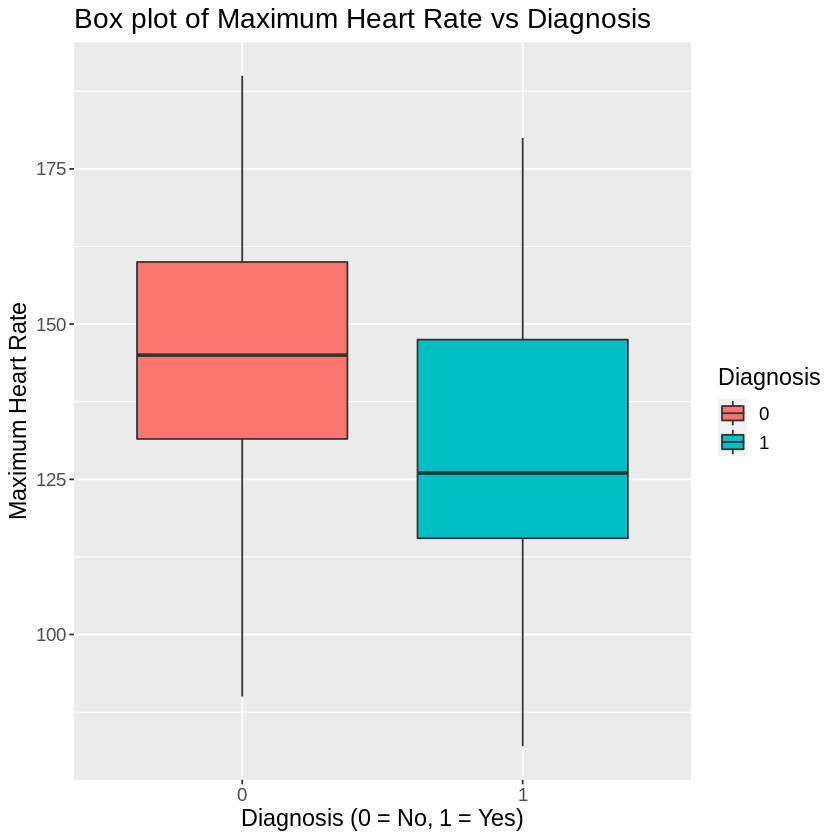

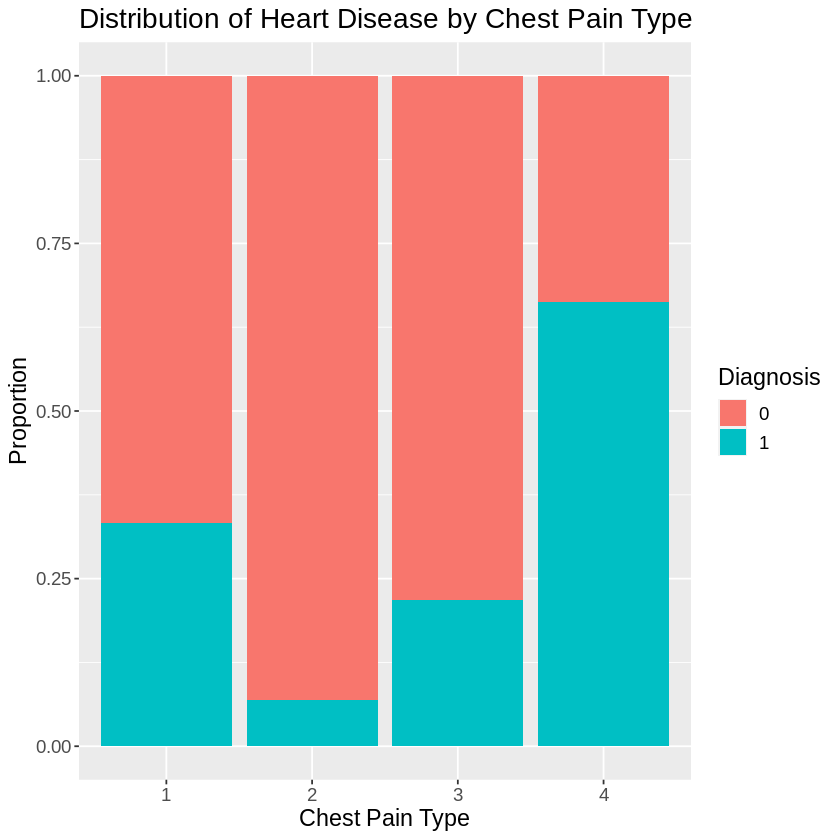

In [8]:
heart_disease_train[heart_disease_train=="?"]<-NA #changing all ? to NA in the dataframe.
heart_disease_train <- heart_disease_train |> mutate_if(is.character, as.numeric) |> mutate_at(vars("sex", "cp", "fbs", "restecg", "exang", "ca", "thal", "num", "slope"), factor)

ggplot(heart_disease_train, aes(x = num, y = thalach, fill = factor(num))) +
  geom_boxplot() +
  labs(x = "Diagnosis (0 = No, 1 = Yes)", y = "Maximum Heart Rate", 
       title = "Box plot of Maximum Heart Rate vs Diagnosis",
       fill = "Diagnosis") +
  theme(text = element_text(size = 14)) +
  guides(fill = guide_legend(title = "Diagnosis"))
ggplot(heart_disease_train, aes(x = cp, fill = factor(num))) + 
  geom_bar(position = "fill") +
  labs(x = "Chest Pain Type", y = "Proportion",
       fill = "Disease Status",
       title = "Distribution of Heart Disease by Chest Pain Type") +
       theme(text = element_text(size = 14)) +
       guides(fill = guide_legend(title = "Diagnosis"))
  

**References**

OECD and World Health Organization (WHO). (2021). State of health in the EU: Country Health Profile 
2017 - Hungary. https://www.euro.who.int/__data/assets/pdf_file/0006/355983/Health-Profile-Hungary-Eng.pdf

CDC: Centers for Disease Control and Prevention. (2022). Heart Disease and Stroke.
https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.

McLaren. (2023). Heart Disease. 
https://www.mclaren.org/main/heart-disease-risk-factors#:~:text=The%20%22uncontrollable%22
%20risk%20factors%20are,and%20common%20lifestyles%20increase%20risk)
 
Hungarian Institute of Cardiology. (1988). Heart Disease Data Set [Dataset]. UCI Machine Learning 
Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease